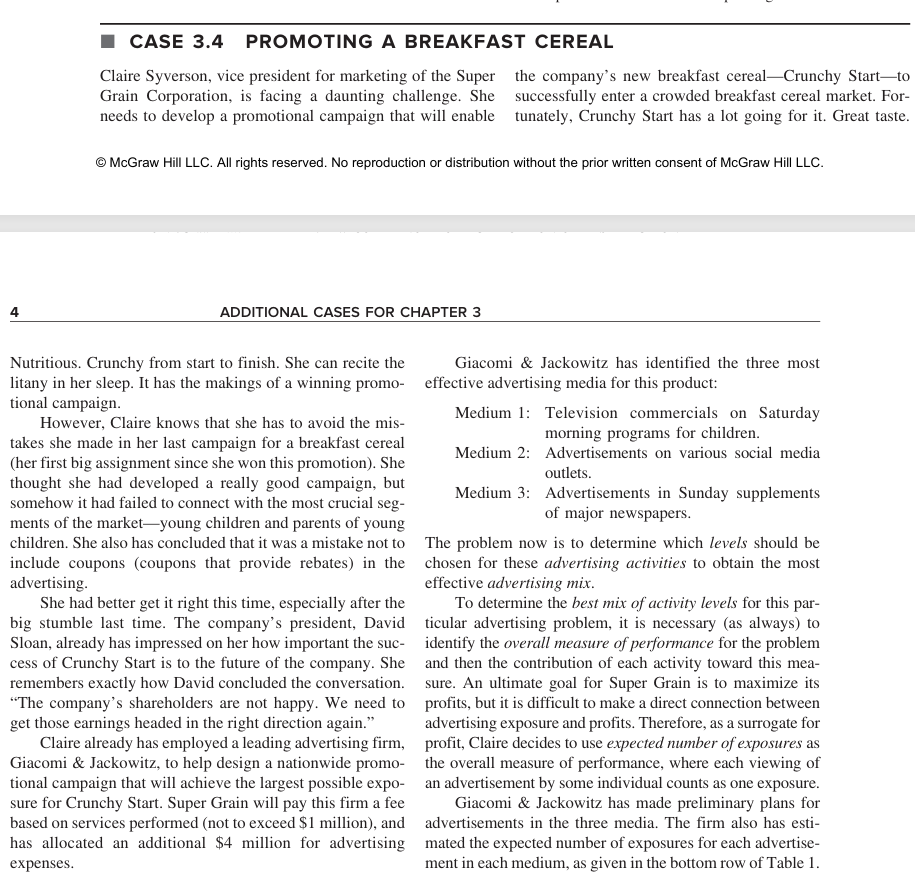
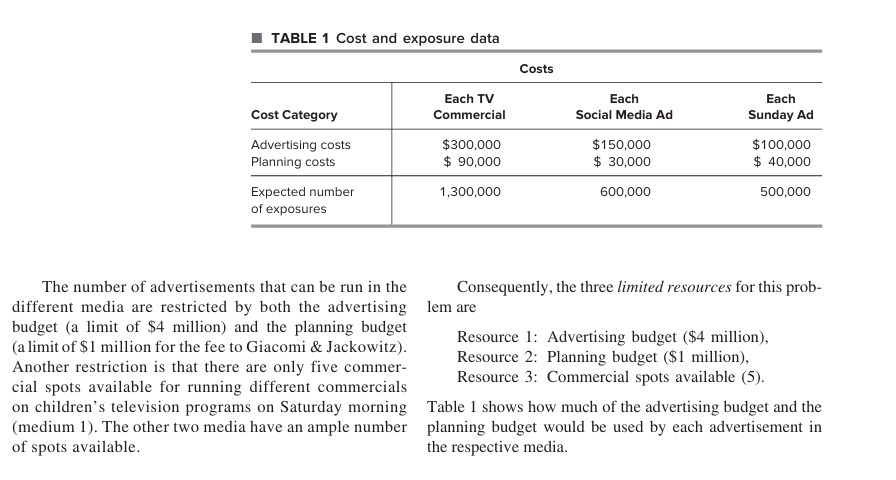
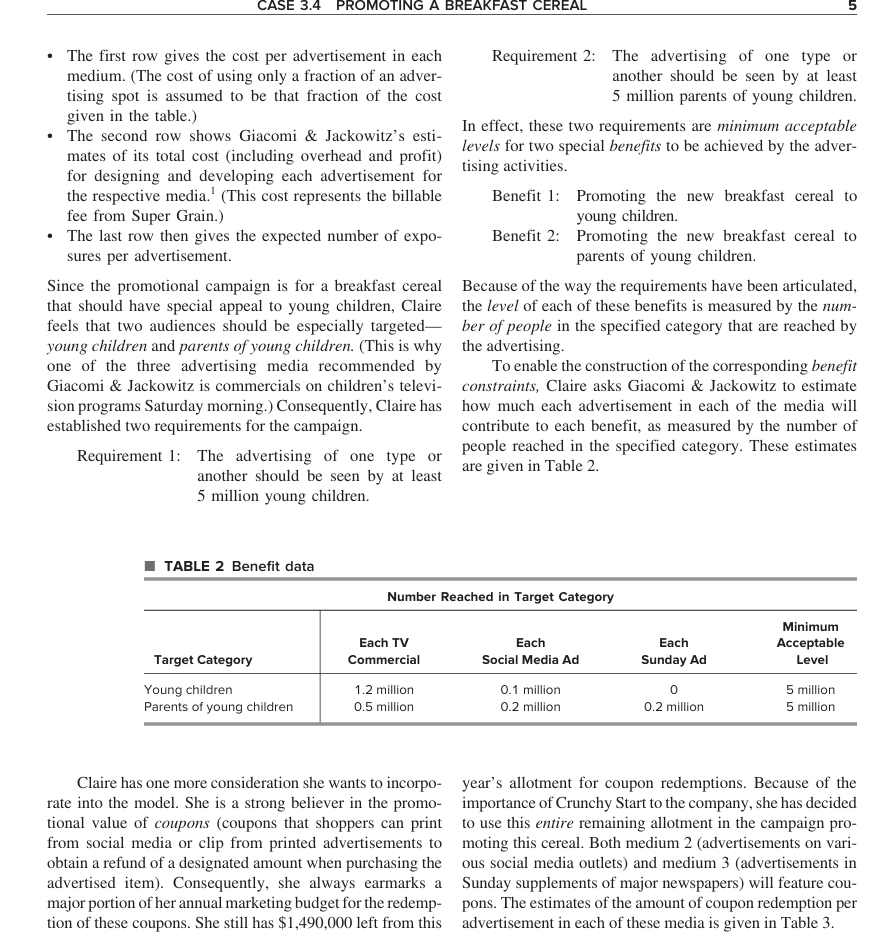
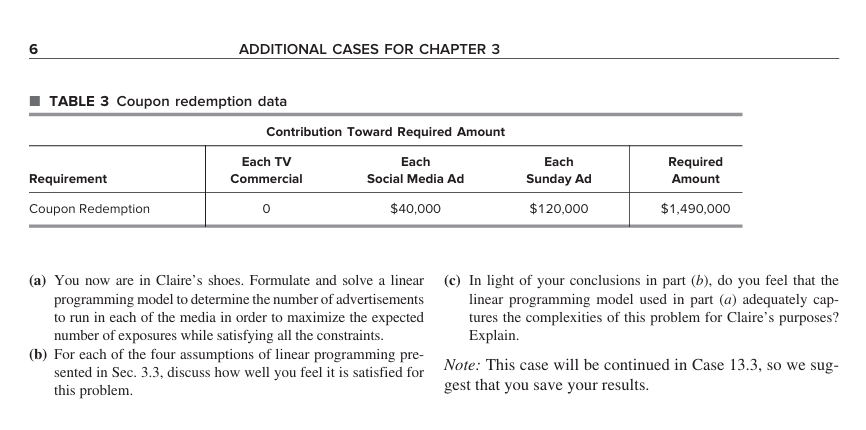

In [6]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("Breakfast Cereal Promotion")

## Defining Variables and dictionaries ##
methods = [1,2,3]   ## Advertising Methods , 1: TV, 2: Social Media, 3: Sunday Ad
ad_cost = {1:300000,2:150000,3:100000}
planning_costs = {1:90000,2:30000,3:40000}
ad_budget = 4000000
planning_budget = 1000000
exp_num = {1:1300000,2:600000,3:500000}

target_ch = {1:1200000,2:100000,3:0}
target_par = {1:500000,2:200000,3:200000}
coupon = {1:0,2:40000,3:120000}
## Decision Variable ##
x = model.addVars(methods,vtype = GRB.CONTINUOUS,lb = 0,name = "x")  ## Number of adverts run on each form

## Objective Function ##
model.setObjective(gp.quicksum(x[i] * exp_num[i] for i in methods),GRB.MAXIMIZE)

## Constraints ##
model.addConstr(gp.quicksum(x[i]*ad_cost[i] for i in methods) <= ad_budget)
model.addConstr(gp.quicksum(x[i]*planning_costs[i] for i in methods) <= planning_budget)
model.addConstr(x[1] <=5)
model.addConstr(gp.quicksum(x[i]*target_ch[i] for i in methods) >= 5000000)
model.addConstr(gp.quicksum(x[i]*target_par[i] for i in methods) >= 5000000)
model.addConstr(gp.quicksum(x[i]*coupon[i] for i in methods) == 1490000)

model.optimize()

methods_names = {1:"TV Commerical",2:"Social Media",3:"Sunday Ad"}

if model.status == GRB.OPTIMAL:
    print("\nBreakfast Cereal Promotion Strategy")
    for i in methods:
        if x[i].X > 0:
            print(f"Number of advertisements through {methods_names[i]} : {x[i].X:,.2f}")
    print(f"Maximized Expected Number of Exposures : {model.ObjVal:,.2f}")
else:
    print("Optimal Solution Not Found")

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 6 rows, 3 columns and 14 nonzeros
Model fingerprint: 0x4df9d445
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [5e+05, 1e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 5e+06]
Presolve removed 3 rows and 1 columns
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7382143e+07   1.975446e+03   0.000000e+00      0s
       2    1.6175000e+07   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.617500000e+07

Breakfast Cereal Promotion Strategy
Number of advertisements through TV Commerical : 3.00
Number of advertisements through 

## Comment on solution ##

When I tried to program it as an integer program, I was getting an error saying infeasible solution, this is because when we come to the constraint of number of coupons, (40,000*x2 + 120,000*x3  == 1,490,000) does not have an integer solution. So I changed the variable type to continous instead and got an optimal solution. However there is a catch to it,we got number of Sunday Ads as 7.75 which is not possible. This is what I guess we will be looking further into in Chapter 13.